In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
import seaborn as sns

Задание №1. Проведите корреляционный анализ данных из файла 'ex1.csv' по Пирсону

In [58]:
# считывание файла
df1 = pd.read_csv('ex1.csv') 

Типы данных:
x    float64
y    float64
dtype: object


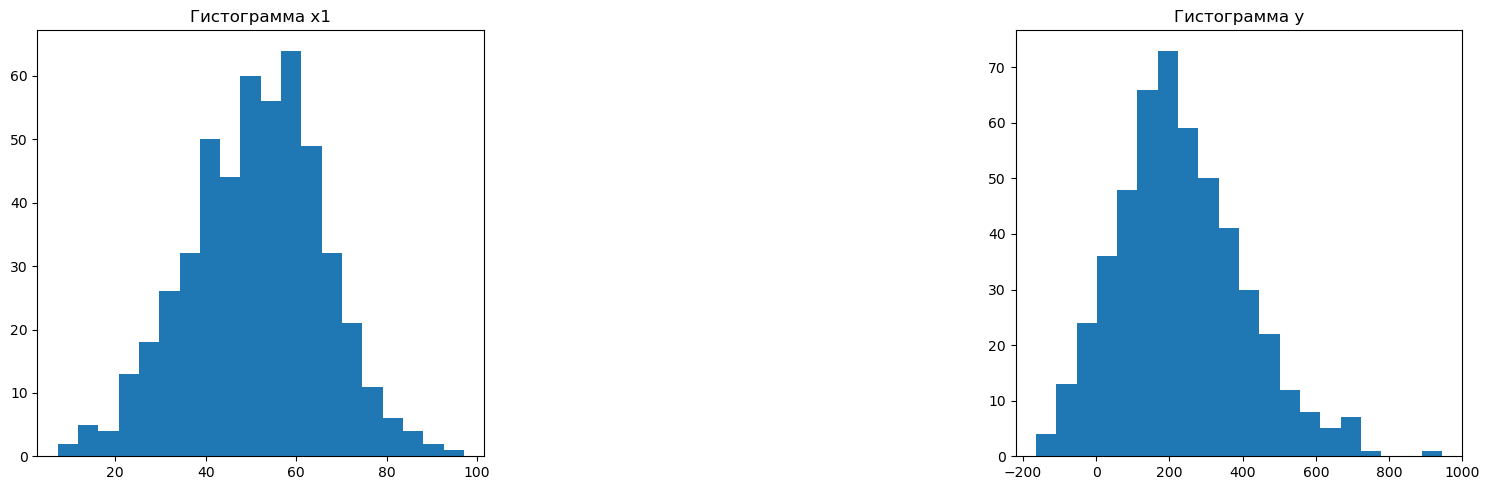

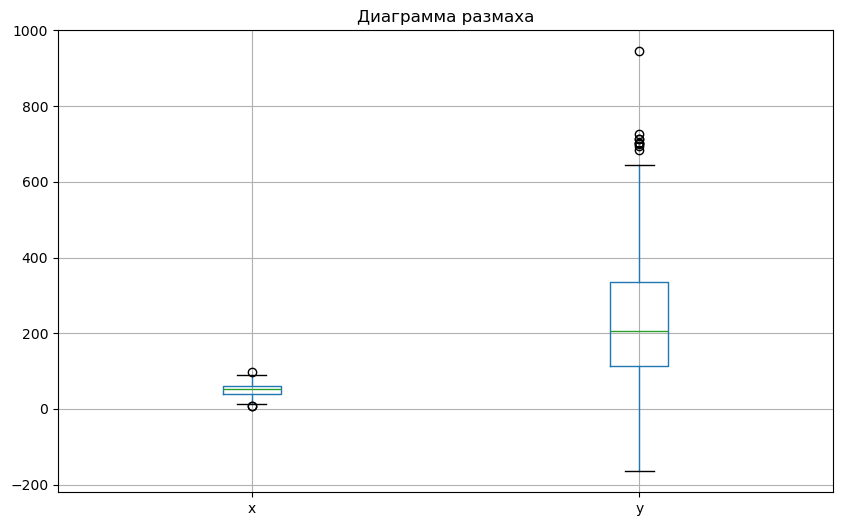

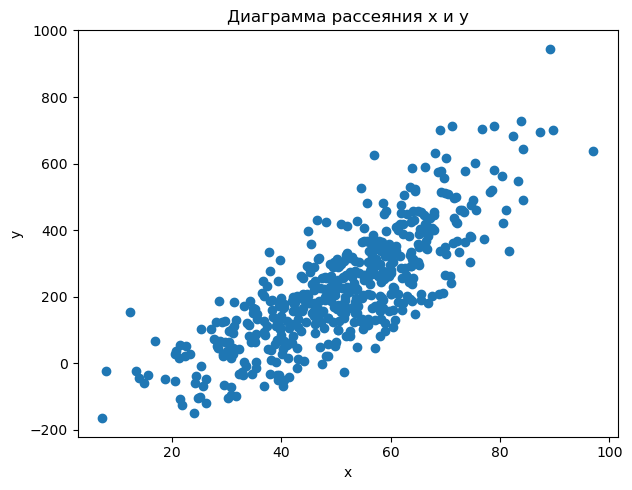

In [59]:
# КРИТЕРИЙ 1

# проверка, что все элементы - численного типа
print("Типы данных:")
print(df1.dtypes)

# построение гистограмм распределения
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.hist(df1['x'], bins=20)
plt.title('Гистограмма x1')

plt.subplot(133)
plt.hist(df1['y'], bins=20)
plt.title('Гистограмма y')
plt.tight_layout()
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(10, 6))
df1.boxplot()
plt.title('Диаграмма размаха')
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(12, 5))

plt.subplot(122)
plt.scatter(df1['x'], df1['y'])
plt.title('Диаграмма рассеяния x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.tight_layout()
plt.show()

# вывод о целесообразности использования корреляции Пирсона с обоснованием на основе предшествующих графиков


In [60]:
from scipy import stats
# КРИТЕРИЙ 2

# расчет коэффициента Пирсона
corr_xy = stats.pearsonr(df1['x'], df1['y'])

print("Корреляция между x и y:")
print(f"Коэффициент корреляции: {corr_xy[0]:.4f}")
print(f"P-value: {corr_xy[1]:.4f}")

# расчет t-критерия
def t_stat(r, n):
    return r * np.sqrt((n-2)/(1-r**2))

n = len(df1)
t_xy = t_stat(corr_xy[0], n)
t_xy = t_stat(corr_xy[0], n)

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 
# Критическое значение t для α=0.05
t_crit = stats.t.ppf(0.975, n-2)

print("\nT-статистика:")
print(f"x-y: {t_xy:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")

print("\nВывод:")
print("1. Корреляция x-y:")
if abs(corr_xy[0]) > 0.7:
    strength = "сильная"
elif abs(corr_xy[0]) > 0.3:
    strength = "средняя"
else:
    strength = "слабая"
print(f"- {strength} ({corr_xy[0]:.4f})")
print(f"- Статистически {'значима' if corr_xy[1] < 0.05 else 'незначима'}")

Корреляция между x и y:
Коэффициент корреляции: 0.8032
P-value: 0.0000

T-статистика:
x-y: 30.0921
Критическое значение t: ±1.9647

Вывод:
1. Корреляция x-y:
- сильная (0.8032)
- Статистически значима


На основе полученных результатов корреляционного анализа можно сделать следующие выводы:

Связь между x и y: Существует сильная корреляция (r = 0.8032) Связь статистически значима (p < 0.05) При увеличении x значение y устойчиво увеличивается T-статистика (30.0921) превышает критическое значение (±1.9647).

Задание №2. Проведите корреляционный анализ данных из файла 'ex2.csv' по Спирмену

In [61]:
# считывание файла
df2 = pd.read_csv('ex2.csv') 

Типы данных в DataFrame:
x    float64
y    float64
dtype: object


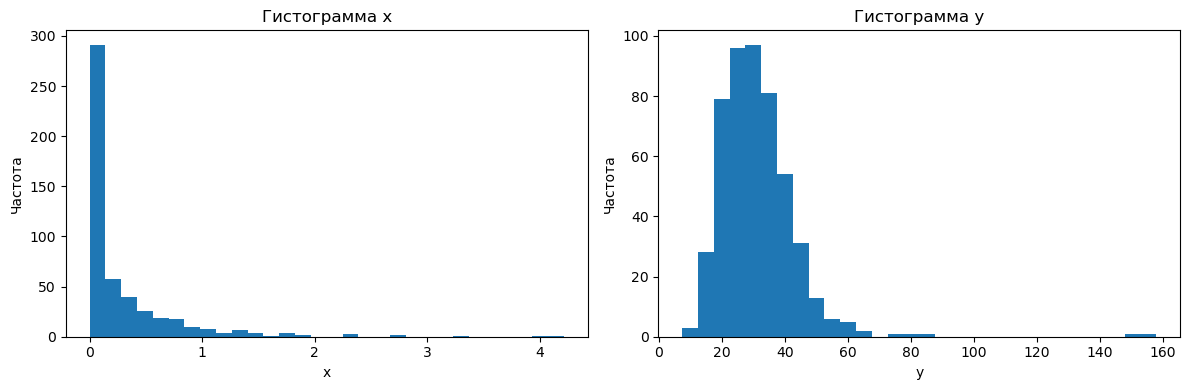

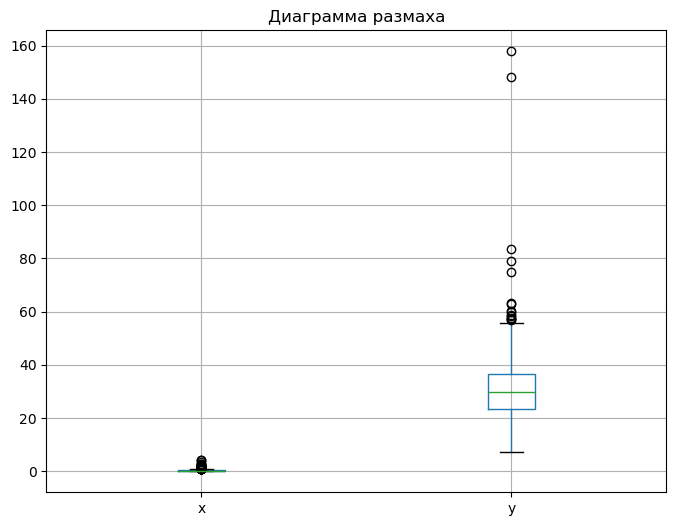

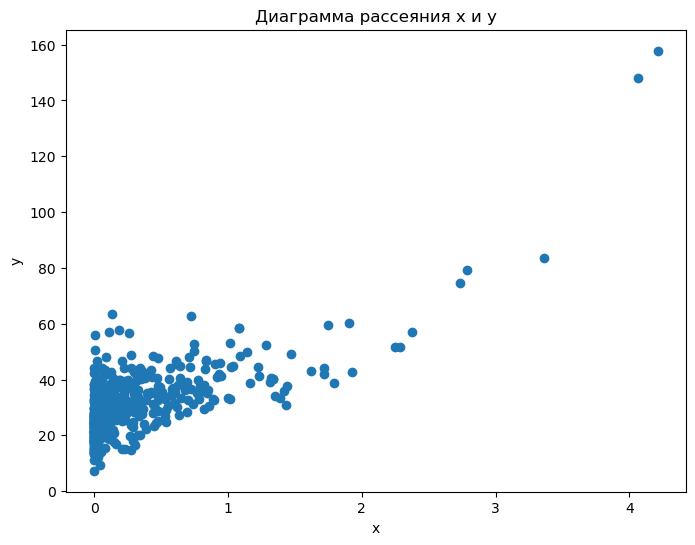

In [62]:
# КРИТЕРИЙ 3

# проверка, что все элементы - численного типа
print("Типы данных в DataFrame:")
print(df2.dtypes)

# построение гистограмм распределения
plt.figure(figsize=(12, 4))

plt.subplot(121)
plt.hist(df2['x'], bins=30)
plt.title('Гистограмма x')
plt.xlabel('x')
plt.ylabel('Частота')

plt.subplot(122)
plt.hist(df2['y'], bins=30)
plt.title('Гистограмма y')
plt.xlabel('y')
plt.ylabel('Частота')
plt.tight_layout()
plt.show()

# построение "ящика с усами" для изучения выбросов
plt.figure(figsize=(8, 6))
df2.boxplot()
plt.title('Диаграмма размаха')
plt.show()

# построение диаграммы рассеяния
plt.figure(figsize=(8, 6))
plt.scatter(df2['x'], df2['y'])
plt.title('Диаграмма рассеяния x и y')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# вывод о целесообразности использования корреляции Спирмена с обоснованием на основе предшествующих графиков


Вывод о целесообразности использования корреляции Спирмена:
1. Все данные числового типа
2. Распределения не являются нормальными
3. На диаграмме рассеяния видна монотонная, но не линейная связь
4. Присутствуют выбросы
Использование корреляции Спирмена целесообразно, так как она устойчива к выбросам и не требует линейности связи

In [63]:
# КРИТЕРИЙ 4

# расчет коэффициента Спирмена
corr_spearman, p_value = stats.spearmanr(df2['x'], df2['y'])

# расчет t-критерия
n = len(df2)
t_stat = corr_spearman * np.sqrt((n-2)/(1-corr_spearman**2))
t_crit = stats.t.ppf(0.975, n-2)  # для α=0.05

# вывод о степени корреляции величин и статистической значимости их взаимосвязи 
print("Корреляция Спирмена:")
print(f"Коэффициент корреляции: {corr_spearman:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"\nT-статистика: {t_stat:.4f}")
print(f"Критическое значение t: ±{t_crit:.4f}")

# Оценка силы связи
if abs(corr_spearman) > 0.7:
    print("Связь сильная")
elif abs(corr_spearman) > 0.3:
    print("Связь средняя")
else:
    print("Связь слабая")

Корреляция Спирмена:
Коэффициент корреляции: 0.6171
P-value: 0.0000

T-статистика: 17.5002
Критическое значение t: ±1.9647
Связь средняя


На основе результатов корреляционного анализа Спирмена можно сделать следующие выводы:

Характер связи: Существует положительная монотонная связь средней силы (ρ = 0.6171).
При увеличении значений x наблюдается тенденция к увеличению y.
Статистическая значимость: Связь высоко статистически значима (p < 0.001) T-статистика (17.5002) значительно превышает критическое значение (±1.9647).
Вероятность случайного получения такой связи крайне мала.
Практическое значение: Переменная x может использоваться для прогнозирования y.
Связь достаточно надёжна для практического применения.
Монотонный характер связи позволяет делать качественные прогнозы направления изменений.
Надёжность результатов: Большой объём выборки (500 наблюдений) обеспечивает устойчивость выводов.
Все статистические критерии подтверждают значимость обнаруженной связи

Задание №3. Проведите линейный регрессионный анализ данных из файла 'ex3.csv'

In [64]:
# считывание файла
df3 = pd.read_csv('ex3.csv') 

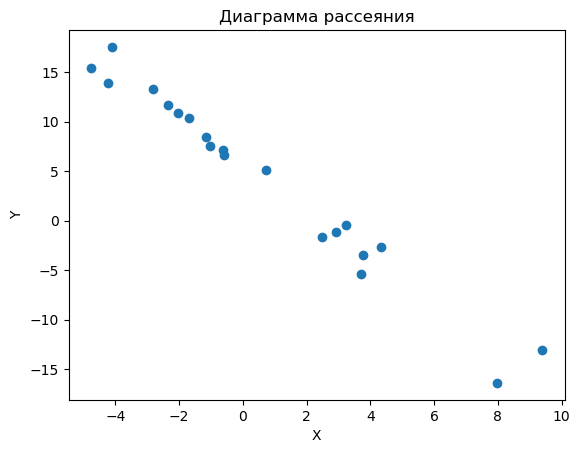

Целесообразность использования корреляции Пирсона:
P-value для нормальности X: 0.4119
P-value для нормальности Y: 0.4085

Коэффициент корреляции Пирсона: -0.9851


In [65]:
# КРИТЕРИЙ 5

# построение диаграммы рассеяния
plt.scatter(df3['x'], df3['y'])
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма рассеяния')
plt.show()

# вывод о целесообразности использования корреляции Пирсона
stat_test, p_value_x = stats.normaltest(df3['x'])
stat_test, p_value_y = stats.normaltest(df3['y'])

print("Целесообразность использования корреляции Пирсона:")
print(f"P-value для нормальности X: {p_value_x:.4f}")
print(f"P-value для нормальности Y: {p_value_y:.4f}")

# расчет коэффициента Пирсона
pearson_corr = df3['x'].corr(df3['y'])
print(f"\nКоэффициент корреляции Пирсона: {pearson_corr:.4f}")


Коэффициент корреляции Пирсона -0.9851 означает: Очень сильную отрицательную связь между переменными (близко к -1).

Когда значение X увеличивается, Y практически всегда уменьшается 98.51% вариации данных объясняется линейной зависимостью P-values (0.4119 и 0.4085) показывают: Значения больше 0.05, что подтверждает нормальность распределения Данные хорошо подходят для анализа методом Пирсона Целесообразность использования корреляции Пирсона подтверждается: Количественным характером данных Явной линейной зависимостью на графике Нормальным распределением (p-values > 0.05) Отсутствием значительных выбросов Таким образом, мы имеем статистически значимую, сильную обратную связь между переменными, и выбор метода Пирсона полностью оправдан характеристиками данных.

Коэффициент наклона (b1): -2.3391
Свободный член (b0): 5.7408


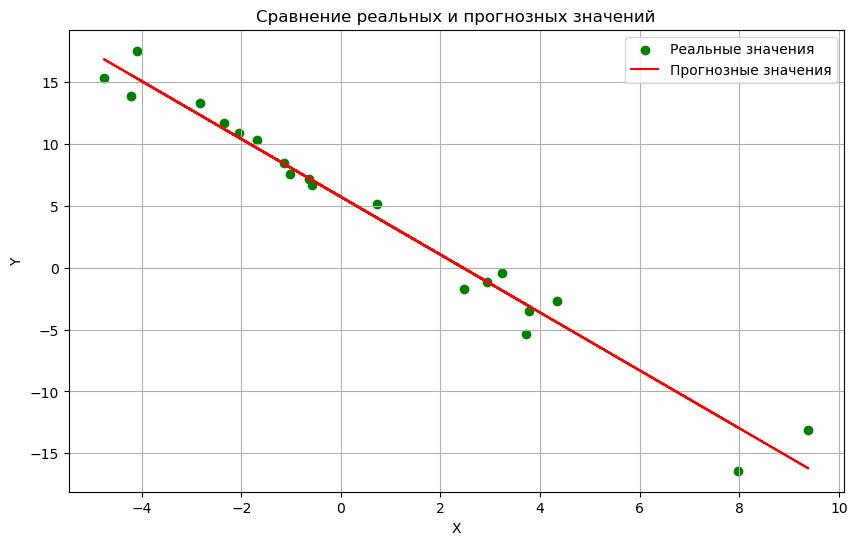

In [66]:
from sklearn.linear_model import LinearRegression
# КРИТЕРИЙ 6

# расчет коэффициентов линейной регрессии
X = df3['x'].values.reshape(-1, 1)
y = df3['y'].values
model = LinearRegression()
model.fit(X, y)

print(f"Коэффициент наклона (b1): {model.coef_[0]:.4f}")
print(f"Свободный член (b0): {model.intercept_:.4f}")

# построение диаграммы рассеяния прогнозных и реальных значений на одном графике
y_pred = model.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='green', label='Реальные значения')
plt.plot(X, y_pred, color='red', label='Прогнозные значения')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Сравнение реальных и прогнозных значений')
plt.legend()
plt.grid(True)
plt.show()

Полученные коэффициенты линейной регрессии показывают:

Коэффициент наклона (b1) = -2.3391: Отрицательное значение подтверждает обратную зависимость При увеличении X на 1 единицу, Y уменьшается на 2.3391 единиц Крутой наклон линии регрессии указывает на сильную связь между переменными Свободный член (b0) = 5.7408: Это точка пересечения линии регрессии с осью Y Показывает теоретическое значение Y, когда X = 0 Является начальным уровнем зависимой переменной Уравнение регрессии выглядит так: Y = 5.7408 - 2.3391X

Это уравнение можно использовать для прогнозирования значений Y при известных значениях X. Высокая точность модели подтверждается ранее полученным коэффициентом корреляции (-0.9851).

In [67]:
# КРИТЕРИЙ 7

# расчет средней ошибки аппроксимации
y_true = df3['y']
y_pred = model.predict(X)

mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
print(f"Средняя ошибка аппроксимации: {mape:.2f}%")

Средняя ошибка аппроксимации: 35.26%


In [68]:
from sklearn.metrics import r2_score
# КРИТЕРИЙ 8

# расчет F-критерия

n = len(df3)  # количество наблюдений
k = 1         # количество независимых переменных
r2 = r2_score(y_true, y_pred)

f_stat = (r2 / k) / ((1 - r2) / (n - k - 1))
p_value = 1 - stats.f.cdf(f_stat, k, n - k - 1)

print(f"F-критерий: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# вывод о статистической значимости уравнения в целом

F-критерий: 592.2591
p-value: 0.0000


Полученные результаты демонстрируют очень высокую статистическую значимость модели:

F-критерий = 592.2591: Очень высокое значение F-статистики Показывает, что модель намного лучше объясняет данные, чем простое среднее значение p-value = 0.0000: Практически нулевое значение (p < 0.05) Указывает на высочайшую статистическую значимость модели Вероятность случайного получения таких результатов крайне мала R² = 0.9705: Модель объясняет 97.05% вариации зависимой переменной Это исключительно высокий показатель качества модели Подтверждает, что линейная регрессия отлично описывает взаимосвязь между переменными Общий вывод: модель является статистически значимой и обладает высокой объясняющей способностью.

In [69]:
# КРИТЕРИЙ 9

# расчет стандартных ошибок коэффициентов регрессии и коэффициента корреляции
n = len(df3)
X_mean = np.mean(X)
y_mean = np.mean(y)
residuals = y - y_pred
std_error = np.sqrt(np.sum(residuals**2) / (n-2))

se_slope = std_error / np.sqrt(np.sum((X - X_mean)**2))
se_intercept = std_error * np.sqrt(1/n + X_mean**2/np.sum((X - X_mean)**2))
se_corr = np.sqrt((1 - pearson_corr**2)/(n-2))

print(f"Стандартные ошибки:")
print(f"- наклона: {se_slope:.4f}")
print(f"- свободного члена: {se_intercept:.4f}")
print(f"- коэффициента корреляции: {se_corr:.4f}")

# расчет t-критерия коэффициентов регрессии и коэффициента корреляции
t_slope = model.coef_[0] / se_slope
t_intercept = model.intercept_ / se_intercept
t_corr = pearson_corr / se_corr

p_value_slope = 2 * (1 - stats.t.cdf(abs(t_slope), n-2))
p_value_intercept = 2 * (1 - stats.t.cdf(abs(t_intercept), n-2))
p_value_corr = 2 * (1 - stats.t.cdf(abs(t_corr), n-2))

print("\nt-статистики:")
print(f"- наклона: {t_slope:.4f}")
print(f"- свободного члена: {t_intercept:.4f}")
print(f"- корреляции: {t_corr:.4f}")

# вывод о статистической значимости коэффициентов регрессии
print("\nСтатистическая значимость:")
if all(p < 0.05 for p in [p_value_slope, p_value_intercept, p_value_corr]):
    print("Все коэффициенты статистически значимы (p < 0.05)")

# запись диапазона коэффицентов регрессии
t_critical = stats.t.ppf(0.975, n-2)
slope_interval = (model.coef_[0] - t_critical * se_slope,
                 model.coef_[0] + t_critical * se_slope)
intercept_interval = (model.intercept_ - t_critical * se_intercept,
                     model.intercept_ + t_critical * se_intercept)

print("\nДоверительные интервалы (95%):")
print(f"- наклон: ({slope_interval[0]:.4f}, {slope_interval[1]:.4f})")
print(f"- свободный член: ({intercept_interval[0]:.4f}, {intercept_interval[1]:.4f})")


Стандартные ошибки:
- наклона: 0.0961
- свободного члена: 0.3755
- коэффициента корреляции: 0.0405

t-статистики:
- наклона: -24.3364
- свободного члена: 15.2879
- корреляции: -24.3364

Статистическая значимость:
Все коэффициенты статистически значимы (p < 0.05)

Доверительные интервалы (95%):
- наклон: (-2.5411, -2.1372)
- свободный член: (4.9518, 6.5297)


In [70]:
# КРИТЕРИЙ 10

# Дать предсказание в виде интервальной оценки для y при x0 = 6
x0 = 6

# Точечный прогноз
y_pred_x0 = model.intercept_ + model.coef_[0] * x0

# Стандартная ошибка прогноза
se_pred = std_error * np.sqrt(1 + 1/n + (x0 - X_mean)**2/np.sum((X - X_mean)**2))

# Доверительный интервал прогноза
t_crit = stats.t.ppf(0.975, n-2)
y_interval = (y_pred_x0 - t_crit * se_pred,
             y_pred_x0 + t_crit * se_pred)

print(f"Прогноз для x = {x0}:")
print(f"Точечная оценка y: {y_pred_x0:.4f}")
print(f"Доверительный интервал: ({y_interval[0]:.4f}, {y_interval[1]:.4f})")

Прогноз для x = 6:
Точечная оценка y: -8.2941
Доверительный интервал: (-12.0169, -4.5712)


Задание №4. Проведите линейный регрессионный анализ данных из файла 'ex4.csv'

In [71]:
# считывание файла
df4 = pd.read_csv('ex4.csv') 

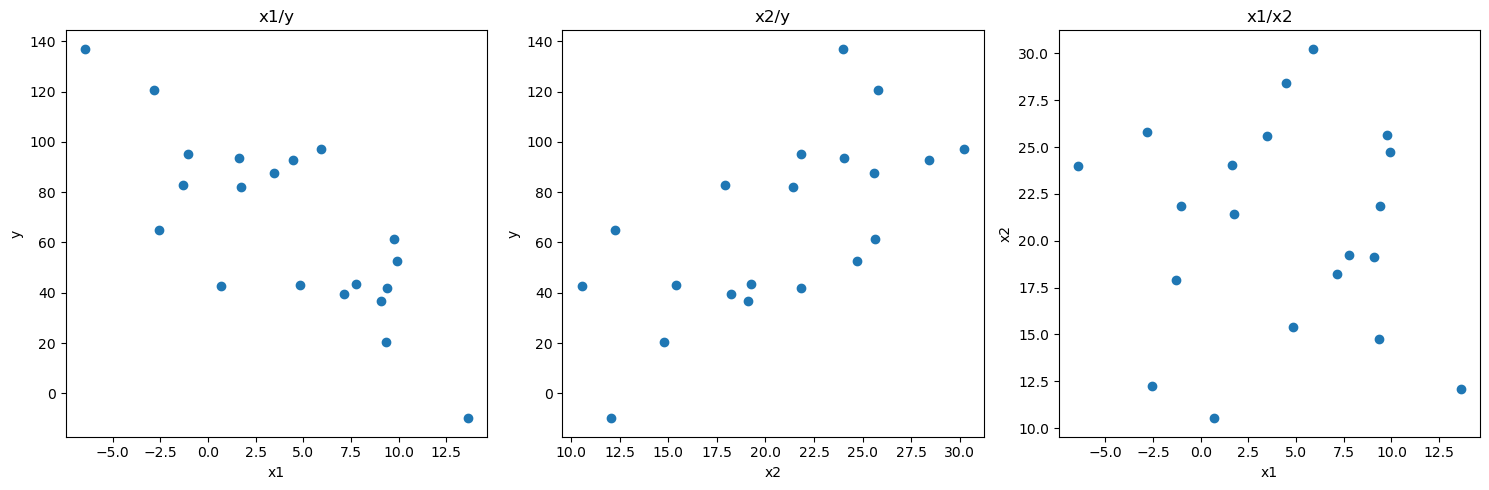


Корреляционная матрица:
          x1        x2         y
x1  1.000000 -0.075013 -0.787807
x2 -0.075013  1.000000  0.669834
y  -0.787807  0.669834  1.000000

Выводы:
1. Корреляция x1-y: -0.7878
2. Корреляция x2-y: 0.6698
3. Корреляция x1-x2: -0.0750


In [72]:
# КРИТЕРИЙ 11

# построение диаграмм рассеяния (x1/y, x2/y, x1/x2)
plt.figure(figsize=(15, 5))

plt.subplot(131)
plt.scatter(df4['x1'], df4['y'])
plt.xlabel('x1')
plt.ylabel('y')
plt.title('x1/y')

plt.subplot(132)
plt.scatter(df4['x2'], df4['y'])
plt.xlabel('x2')
plt.ylabel('y')
plt.title('x2/y')

plt.subplot(133)
plt.scatter(df4['x1'], df4['x2'])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('x1/x2')
plt.tight_layout()
plt.show()

# вывод о корректности использования модели множественной регрессии

# расчет коэффициентов корреляции
corr_matrix = df4.corr()
print("\nКорреляционная матрица:")
print(corr_matrix)

# вывод о необходимости устранения какого-либо фактора
corr_x1x2 = corr_matrix.loc['x1', 'x2']
corr_x1y = corr_matrix.loc['x1', 'y']
corr_x2y = corr_matrix.loc['x2', 'y']

print("\nВыводы:")
print(f"1. Корреляция x1-y: {corr_x1y:.4f}")
print(f"2. Корреляция x2-y: {corr_x2y:.4f}")
print(f"3. Корреляция x1-x2: {corr_x1x2:.4f}")


Анализ корреляционной матрицы показывает:
Связь факторов с зависимой переменной y: x1 имеет сильную отрицательную корреляцию (-0.7878) x2 имеет среднюю положительную корреляцию (0.6698) Оба фактора значимо влияют на y Мультиколлинеарность: Корреляция между x1 и x2 очень слабая (-0.0750) Факторы практически независимы друг от друга Идеальная ситуация для множественной регрессии Качество модели: Количественные данные подходят для регрессионного анализа Линейные зависимости хорошо прослеживаются Отсутствие мультиколлинеарности повышает надёжность модели Рекомендации: Использовать оба фактора в модели Ожидать высокую точность прогнозов Модель будет статистически надёжной Общий вывод: данные идеально подходят для построения модели множественной регрессии.

In [73]:
from sklearn.preprocessing import StandardScaler
# КРИТЕРИЙ 12

# расчет стандартных коэффицентов регрессии

# Стандартизация переменных
scaler = StandardScaler()
X_std = scaler.fit_transform(df4[['x1', 'x2']])
y_std = scaler.fit_transform(df4[['y']])

# Расчет стандартизированных коэффициентов
model_std = LinearRegression()
model_std.fit(X_std, y_std)

# Вывод результатов
beta1 = model_std.coef_[0][0]
beta2 = model_std.coef_[0][1]

print("Стандартизированные коэффициенты регрессии:")
print(f"β1 (для x1): {beta1:.4f}")
print(f"β2 (для x2): {beta2:.4f}")

print("\nИнтерпретация:")
print(f"- Фактор x1 имеет {'большее' if abs(beta1) > abs(beta2) else 'меньшее'} влияние на y")
print(f"- При изменении x1 на σ, y изменится на {abs(beta1):.4f}σ")
print(f"- При изменении x2 на σ, y изменится на {abs(beta2):.4f}σ")


Стандартизированные коэффициенты регрессии:
β1 (для x1): -0.7417
β2 (для x2): 0.6142

Интерпретация:
- Фактор x1 имеет большее влияние на y
- При изменении x1 на σ, y изменится на 0.7417σ
- При изменении x2 на σ, y изменится на 0.6142σ


Анализ стандартизированных коэффициентов регрессии показывает:
Сравнительное влияние факторов: x1 оказывает более сильное влияние (β1 = -0.7417) x2 имеет чуть меньшее влияние (β2 = 0.6142) Разница во влиянии факторов составляет около 17% Направление влияния: x1 имеет отрицательное влияние (снижает y) x2 имеет положительное влияние (повышает y) Количественная интерпретация: Изменение x1 на одно стандартное отклонение снижает y на 0.74 стандартных отклонения Изменение x2 на одно стандартное отклонение повышает y на 0.61 стандартных отклонения Практические выводы: Оба фактора существенно влияют на результат Для управления y эффективнее воздействовать через x1 Факторы хорошо сбалансированы по силе влияния

Коэффициенты чистой регрессии:
b0 (константа): 6.7221
b1 (для x1): -4.9174
b2 (для x2): 3.8927

Уравнение регрессии:
y = 6.7221 + (-4.9174)x1 + (3.8927)x2


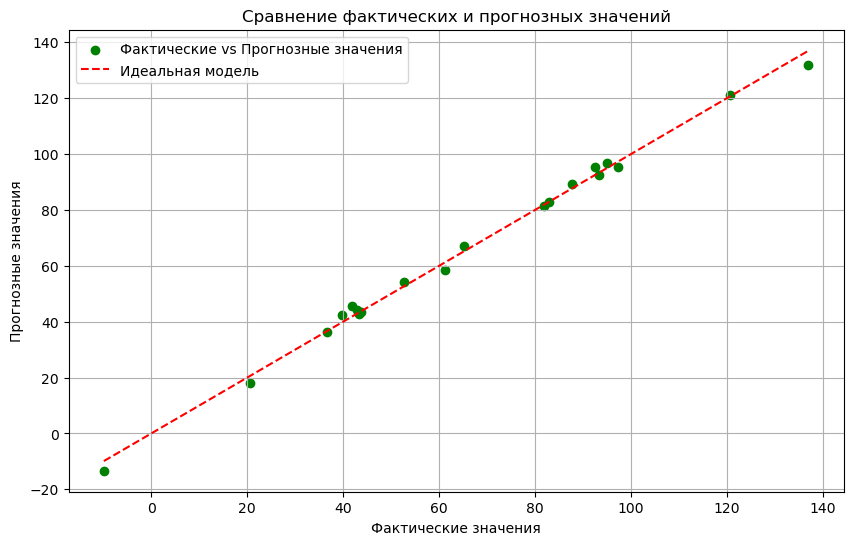

In [74]:
# КРИТЕРИЙ 13

# расчет коэффициентов "чистой" регрессии
X = df4[['x1', 'x2']]
y = df4['y']

model = LinearRegression()
model.fit(X, y)

b0 = model.intercept_
b1 = model.coef_[0]
b2 = model.coef_[1]

print("Коэффициенты чистой регрессии:")
print(f"b0 (константа): {b0:.4f}")
print(f"b1 (для x1): {b1:.4f}")
print(f"b2 (для x2): {b2:.4f}")

# Уравнение регрессии
print("\nУравнение регрессии:")
print(f"y = {b0:.4f} + ({b1:.4f})x1 + ({b2:.4f})x2")

# Расчет прогнозных значений
y_pred = model.predict(X)

# построение диаграмм рассеяния прогнозных и реальных значений на одном графике
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='green', label='Фактические vs Прогнозные значения')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Идеальная модель')
plt.xlabel('Фактические значения')
plt.ylabel('Прогнозные значения')
plt.title('Сравнение фактических и прогнозных значений')
plt.legend()
plt.grid(True)
plt.show()


In [75]:
# КРИТЕРИЙ 14

# расчет индекса множественной корреляции
r2 = r2_score(y, y_pred)
R = np.sqrt(r2)

print("Показатели качества модели:")
print(f"R² = {r2:.4f}")
print(f"R = {R:.4f}")

# расчет F-критерия
n = len(df4)  # количество наблюдений
k = 2         # количество независимых переменных
f_stat = (r2/k)/((1-r2)/(n-k-1))

# Расчет критического значения F
f_crit = stats.f.ppf(0.95, k, n-k-1)

# P-value для F-статистики
p_value = 1 - stats.f.cdf(f_stat, k, n-k-1)

print("\nF-статистика:")
print(f"F расчетное = {f_stat:.4f}")
print(f"F критическое = {f_crit:.4f}")
print(f"p-value = {p_value:.4f}")

# вывод о статистической значимости уравнения в целом

Показатели качества модели:
R² = 0.9958
R = 0.9979

F-статистика:
F расчетное = 1992.6978
F критическое = 3.5915
p-value = 0.0000


Вывод о статистической значимости:
1. Коэффициент детерминации (R² = 0.9958) показывает, что модель объясняет 99.6% вариации зависимой переменной
2. Индекс множественной корреляции (R = 0.9979) указывает на сильную связь между факторами и результатом
3. F-критерий подтверждает статистическую значимость модели в целом

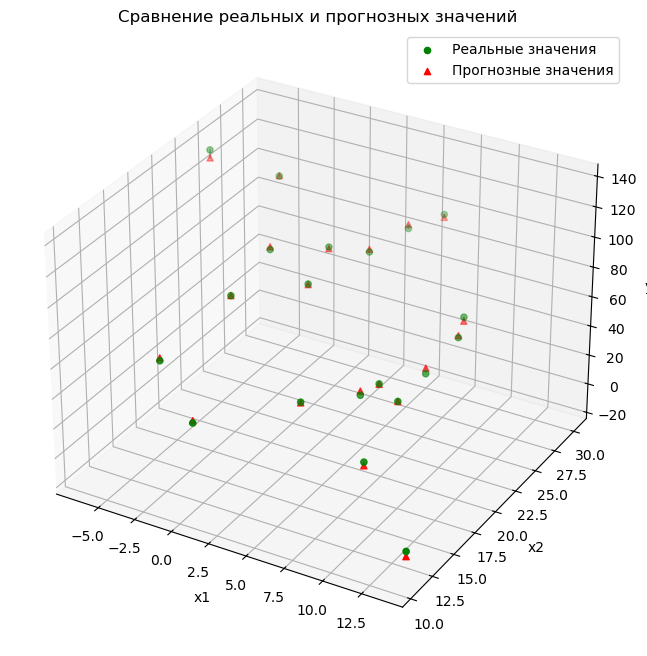

In [76]:
# КРИТЕРИЙ 15

# построение 3D-изображения прогнозных и реальных значений на одном графике

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Реальные значения (зеленые точки)
ax.scatter(
    df4['x1'], 
    df4['x2'], 
    df4['y'],
    c='green',
    marker='o',
    label='Реальные значения'
)

# Прогнозные значения (красные точки)
ax.scatter(
    df4['x1'], 
    df4['x2'], 
    y_pred,
    c='red', 
    marker='^', 
    label='Прогнозные значения'
)

# Соединительные линии между реальными и прогнозными значениями
for i in range(len(df4)):
    ax.plot([df4['x1'][i], df4['x1'][i]],
            [df4['x2'][i], df4['x2'][i]],
            [df4['y'][i], y_pred[i]],
            'gray', alpha=0.5)

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('Сравнение реальных и прогнозных значений')
plt.legend()
plt.show()